<a href="https://colab.research.google.com/github/akshayanant/googlecolab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
transient = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(transient,batch_size = batch_size,shuffle = True)

In [0]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([4, 1, 28, 28])
torch.Size([4])


In [0]:
def plot_image(image):
  plt.imshow(np.transpose(image,(1,2,0)).squeeze())
  plt.show
  

In [0]:
np.transpose(images[0],(1,2,0)).shape

torch.Size([28, 28, 1])

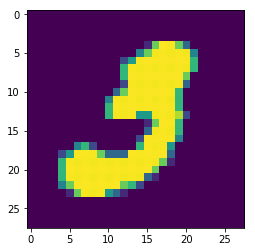

In [0]:
plot_image(images[0])

In [0]:
class MyMNISTNet(nn.Module):
  
  def __init__(self):
    torch.manual_seed(0)
    super(MyMNISTNet, self).__init__()
    self.net = nn.Sequential(nn.Linear(784,48),
                             nn.ReLU(),
                             nn.Linear(48,24),
                             nn.ReLU(),
                             nn.Linear(24,10))
    
  def forward(self, X):
    return self.net(X.view(X.size(0),-1))
  

In [0]:
mnistnet = MyMNISTNet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(mnistnet.parameters(),lr=0.01)
batch_size = 512
trainloader = torch.utils.data.DataLoader(transient,batch_size = batch_size,shuffle = True)


In [0]:
def train_net(opt,loss_fn,net,epochs,trainloader):
  for e in range(epochs):
    for i,data in enumerate(trainloader,0):
      image,label = data
      opt.zero_grad()
      pred = net(image)
      loss = loss_fn(pred,label)
      loss.backward()
      opt.step()
      if(i%100==0):
        eval(net)
      

In [0]:
def eval(mnistnet,train= True):
  batch_size_in = batch_size
  mnistnet.eval()
  if(train!=True):
    batch_size_in = 100
    transient_test = torchvision.datasets.MNIST(root='./data', train=False, 
                                            download=True, 
                                            transform=transforms.ToTensor())
    trainloader_test = torch.utils.data.DataLoader(transient_test,batch_size = batch_size_in,shuffle = True)
    success = 0
    images,labels = next(iter(trainloader_test))
    pred = mnistnet(images)
    
  else:
    success = 0
    images,labels = next(iter(trainloader))
    pred = mnistnet(images)
  for i in range(pred.shape[0]):
    if(pred.argmax(-1)[i]==labels[i]):
      success +=1
  print('Accuracy = ',success/batch_size_in)


In [0]:
train_net(opt,loss_fn,mnistnet,5,trainloader)

Accuracy =  0.322265625
Accuracy =  0.93359375
Accuracy =  0.923828125
Accuracy =  0.95703125
Accuracy =  0.955078125
Accuracy =  0.9765625
Accuracy =  0.951171875
Accuracy =  0.9765625
Accuracy =  0.9765625
Accuracy =  0.982421875


In [0]:
eval(mnistnet,False)

Accuracy =  0.96
